In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
births = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Birthrate-Analysis/master/births.csv')
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [3]:
births.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

In [4]:
births.day.fillna(0, inplace = True)

In [5]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,0.0,M,183219
15543,2008,11,0.0,F,158939
15544,2008,11,0.0,M,165468
15545,2008,12,0.0,F,173215


In [6]:
births['day']= births.day.astype(int)

In [7]:
births.dtypes

year       int64
month      int64
day        int32
gender    object
births     int64
dtype: object

In [8]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


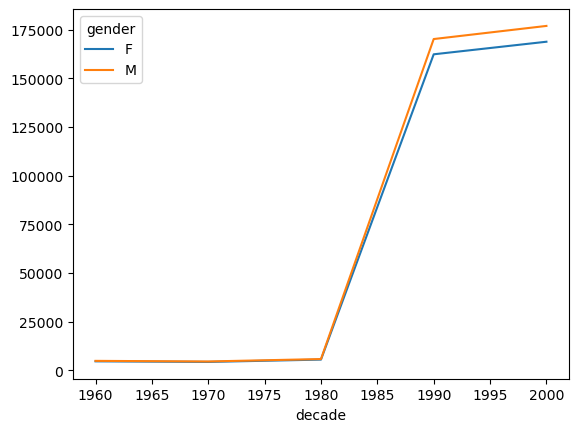

In [9]:
b = births.pivot_table('births', index='decade', columns='gender')
b.plot()
plt.show()

In [10]:
births.pivot_table('births', index='decade', columns='gender')

gender,F,M
decade,,
1960,4566.755208,4808.781250
1970,4267.403569,4497.386393
1980,5460.886072,5740.886635
1990,162328.783333,170171.275000
2000,168789.898148,176911.370370


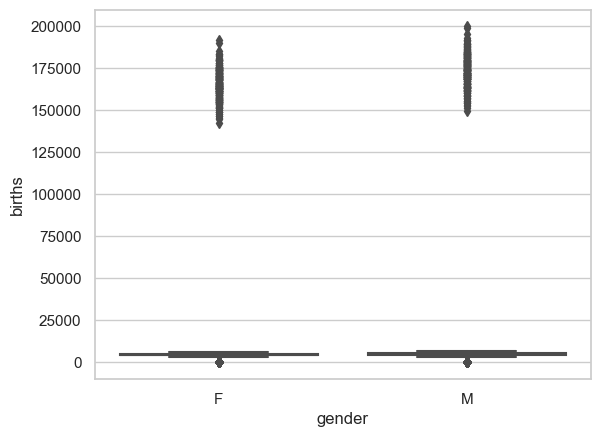

In [11]:
sns.set(style='whitegrid')
 
sns.boxplot( x= 'gender', y = 'births',data=births)
plt.show()                
                

In [12]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

689.31

In [13]:
births['births'].mean()

9762.293561458802

In [14]:
bi = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
bi

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980


In [17]:
births

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,0,M,183219,2000
15543,2008,11,0,F,158939,2000
15544,2008,11,0,M,165468,2000
15545,2008,12,0,F,173215,2000


In [18]:
quartiles[1]

4814.0